In [112]:
%matplotlib inline

from collections import OrderedDict
import glob
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qiime2 import Artifact

# Explaining Songbird parameters

One of the most frequent questions that arise when using Songbird is "*how do I pick good parameters?*". This is an incredibly point of consideration that we felt merited a short auxillary demonstration. Here, we will try to demystify what some of the important Songbird parameters are and how they can affect your model.

In [141]:
palette = ["#003f5c", "#ef5675", "#ffa600"]

def annotate_plots(axs):
    axs[0].xaxis.set_visible(False)
    axs[0].set_ylabel("Cross-Validation", fontsize=20)
    axs[1].set_ylabel("Loss", fontsize=20)
    axs[1].set_xlabel("Iteration", fontsize=20)
    for ax in axs: 
        ax.yaxis.get_offset_text().set_fontsize(14)
        ax.tick_params("both", labelsize=14)

## `epochs`

This is probably the simplest parameter to conceptualize. All `epochs` is doing is telling Songbird how many times to iterate over your dataset. The longer this goes, (ideally) the more your model will converge. If your graphs aren't plateauing yet (but are decreasing), you should increase your epochs while keeping the rest of the parameters the same.

In [131]:
epochs_dict = sorted({
    re.search("epochs_(\d+)_stats.tsv", x).groups()[0]: pd.read_csv(x, sep="\t", index_col=0)
    for x in glob.glob("../results/vary_epochs/*_stats.tsv")
}.items(), key=lambda x: int(x[0]))
epochs_dict = OrderedDict(epochs_dict)

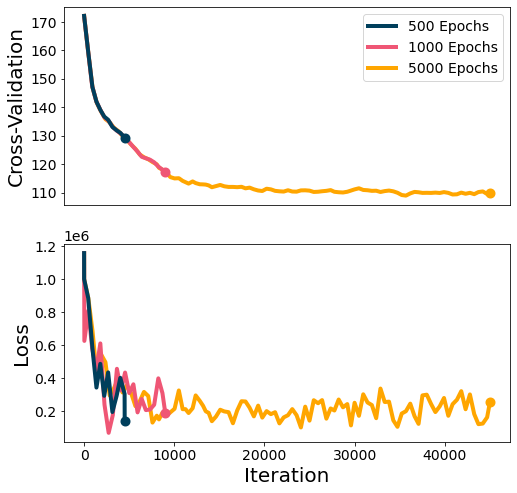

In [166]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for i, (e, df) in enumerate(epochs_dict.items()):
    args = {"linewidth": 4, "zorder": 3-i, "color": palette[i]}
    axs[0].plot(
        df["iteration"],
        df["cross-validation"],
        **args,
        label=f"{e} Epochs"
    )
    axs[1].plot(
        df["iteration"],
        df["loss"],
        **args,
    )
    axs[0].scatter(
        df["iteration"].tail(1),
        df["cross-validation"].tail(1),
        **args
    )
    axs[1].scatter(
        df["iteration"].tail(1),
        df["loss"].tail(1),
        **args
    )
    
axs[0].legend(fontsize=14)
annotate_plots(axs)

plt.show()

## `learning_rate`

In [133]:
lr_dict = sorted({
    re.search("lr_(.*)_stats.tsv", x).groups()[0]: pd.read_csv(x, sep="\t", index_col=0)
    for x in glob.glob("../results/vary_learning_rate/*_stats.tsv")
}.items(), key=lambda x: float(x[0]))
lr_dict = OrderedDict(lr_dict)

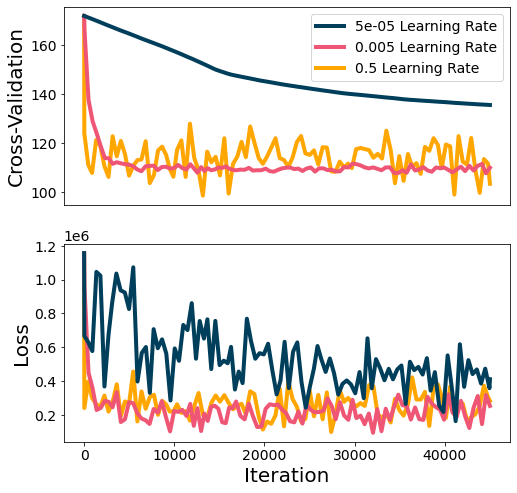

In [134]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for i, (e, df) in enumerate(lr_dict.items()):
    args = {"linewidth": 4, "zorder": 3-i, "color": palette[i]}
    axs[0].plot(
        df["iteration"],
        df["cross-validation"],
        **args,
        label=f"{e} Learning Rate"
    )
    axs[1].plot(
        df["iteration"],
        df["loss"],
        **args,
    )
    
axs[0].legend(fontsize=14)
annotate_plots(axs)

plt.show()

## `differential_prior` - Properly Fit

In [156]:
dp_good_dict = sorted({
    re.search("dp_(.*)_good_stats.tsv", x).groups()[0]: pd.read_csv(x, sep="\t", index_col=0)
    for x in glob.glob("../results/vary_differential_prior/*_good_stats.tsv")
}.items(), key=lambda x: float(x[0]))
dp_good_dict = OrderedDict(dp_good_dict)

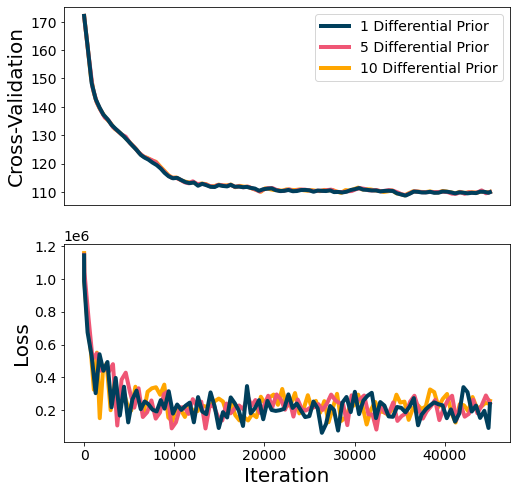

In [157]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for i, (e, df) in enumerate(dp_good_dict.items()):
    args = {"linewidth": 4, "zorder": 3-i, "color": palette[i]}
    axs[0].plot(
        df["iteration"],
        df["cross-validation"],
        **args,
        label=f"{e} Differential Prior",
    )
    axs[1].plot(
        df["iteration"],
        df["loss"],
        **args,
    )
    
axs[0].legend(fontsize=14)
annotate_plots(axs)

plt.show()

## `differential_prior` - Overfit

In [155]:
dp_bad_dict = sorted({
    re.search("dp_(.*)_bad_stats.tsv", x).groups()[0]: pd.read_csv(x, sep="\t", index_col=0)
    for x in glob.glob("../results/vary_differential_prior/*_bad_stats.tsv")
}.items(), key=lambda x: float(x[0]))
dp_bad_dict = OrderedDict(dp_bad_dict)

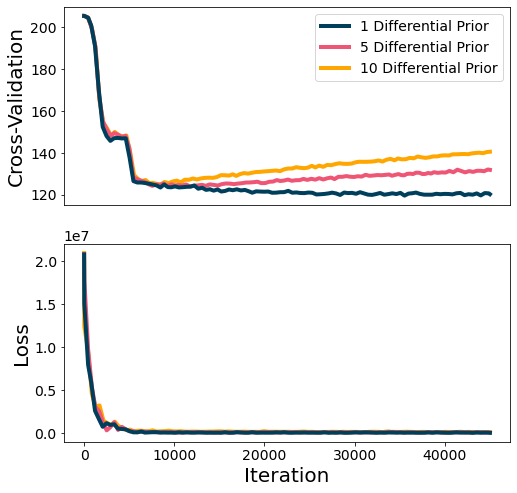

In [158]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for i, (e, df) in enumerate(dp_bad_dict.items()):
    args = {"linewidth": 4, "zorder": 3-i, "color": palette[i]}
    axs[0].plot(
        df["iteration"],
        df["cross-validation"],
        **args,
        label=f"{e} Differential Prior",
    )
    axs[1].plot(
        df["iteration"],
        df["loss"],
        **args,
    )
    
axs[0].legend(fontsize=14)
annotate_plots(axs)

plt.show()

# A note on $Q^2$ score